# Import dependencies

In [1]:
import numpy as np # used for algebra operations
import pandas as pd # Data procesing
import seaborn as sns # statistical data visualization
from matplotlib import pyplot as plt
%matplotlib inline

# Import dataset

In [2]:
df = pd.read_csv('./data/data_2015.csv')
df.head()

,Fecha,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARÍN,MIGUEL CLARO,POCURO,RICARDO LYON
0,29/03/2015 00:00,8,20.0,38.0,17,NaN,31,18
1,29/03/2015 01:00,6,21.0,14.0,14,NaN,20,13
2,29/03/2015 02:00,1,13.0,6.0,11,NaN,24,10
3,29/03/2015 03:00,3,10.0,6.0,11,NaN,10,9
4,29/03/2015 04:00,1,6.0,4.0,4,NaN,11,3


In [3]:
# Describe our dataset
df.describe()

,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARÍN,MIGUEL CLARO,POCURO,RICARDO LYON
count,6672.000000,6654.000000,6643.000000,6672.000000,3750.000000,6672.000000,6672.000000
mean,127.395084,70.734896,73.154900,69.884442,51.014400,126.440947,105.830036
std,162.141802,73.060974,75.088782,87.033774,52.454487,137.420884,108.762720
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,11.000000,12.000000,9.000000,9.000000,18.000000,11.000000
50%,84.000000,57.000000,62.000000,47.000000,40.000000,100.000000,89.000000
75%,169.000000,97.000000,100.000000,85.000000,71.000000,170.000000,153.000000
max,948.000000,381.000000,538.000000,506.000000,290.000000,754.000000,556.000000


In [4]:
# normalize columns
df = df.rename(index=str, columns={"MARÍN": "MARIN"})
df.head()

,Fecha,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARIN,MIGUEL CLARO,POCURO,RICARDO LYON
0,29/03/2015 00:00,8,20.0,38.0,17,NaN,31,18
1,29/03/2015 01:00,6,21.0,14.0,14,NaN,20,13
2,29/03/2015 02:00,1,13.0,6.0,11,NaN,24,10
3,29/03/2015 03:00,3,10.0,6.0,11,NaN,10,9
4,29/03/2015 04:00,1,6.0,4.0,4,NaN,11,3


In [5]:
# MIGUEL CLARO, ANTONIO VARAS and BUSTAMANTE have missing values, 
# if you see the max count it's 6672, and those have less than that
# so we should fill these missing values

# let's fill with average values from their respective column


# Fill missing data
df['BUSTAMANTE'] = df['BUSTAMANTE'].fillna(0);
df['MIGUEL CLARO'] = df['BUSTAMANTE'].fillna(0);
df['ANTONIO VARAS'] = df['BUSTAMANTE'].fillna(0);
df.describe()

,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARIN,MIGUEL CLARO,POCURO,RICARDO LYON
count,6672.000000,6672.000000,6672.000000,6672.000000,6672.000000,6672.000000,6672.000000
mean,127.395084,72.836930,72.836930,69.884442,72.836930,126.440947,105.830036
std,162.141802,75.079809,75.079809,87.033774,75.079809,137.420884,108.762720
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,11.000000,11.000000,9.000000,11.000000,18.000000,11.000000
50%,84.000000,62.000000,62.000000,47.000000,62.000000,100.000000,89.000000
75%,169.000000,99.250000,99.250000,85.000000,99.250000,170.000000,153.000000
max,948.000000,538.000000,538.000000,506.000000,538.000000,754.000000,556.000000


In [6]:
# let's create another column with day of week

import datetime

def convertDateToDayOfWeek(date):
    return datetime.datetime.strptime(date, '%d/%m/%Y %H:%M').strftime('%A')

df['DayOfWeek'] = df['Fecha'].map(lambda x: convertDateToDayOfWeek(x))
df.head()

,Fecha,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARIN,MIGUEL CLARO,POCURO,RICARDO LYON,DayOfWeek
0,29/03/2015 00:00,8,38.0,38.0,17,38.0,31,18,Sunday
1,29/03/2015 01:00,6,14.0,14.0,14,14.0,20,13,Sunday
2,29/03/2015 02:00,1,6.0,6.0,11,6.0,24,10,Sunday
3,29/03/2015 03:00,3,6.0,6.0,11,6.0,10,9,Sunday
4,29/03/2015 04:00,1,4.0,4.0,4,4.0,11,3,Sunday


In [7]:
# Let's create a new column "hour" 

df['Hour'] = df['Fecha'].map(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H:%M').hour)
df.head()

,Fecha,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARIN,MIGUEL CLARO,POCURO,RICARDO LYON,DayOfWeek,Hour
0,29/03/2015 00:00,8,38.0,38.0,17,38.0,31,18,Sunday,0
1,29/03/2015 01:00,6,14.0,14.0,14,14.0,20,13,Sunday,1
2,29/03/2015 02:00,1,6.0,6.0,11,6.0,24,10,Sunday,2
3,29/03/2015 03:00,3,6.0,6.0,11,6.0,10,9,Sunday,3
4,29/03/2015 04:00,1,4.0,4.0,4,4.0,11,3,Sunday,4


In [8]:
# Create a total column
bike_ways = ['ANDRES BELLO', 'ANTONIO VARAS', 'BUSTAMANTE', 'MARIN', 'MIGUEL CLARO', 'POCURO', 'RICARDO LYON']
df['total'] = df[bike_ways].sum(axis=1)
df.head()

,Fecha,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARIN,MIGUEL CLARO,POCURO,RICARDO LYON,DayOfWeek,Hour,total
0,29/03/2015 00:00,8,38.0,38.0,17,38.0,31,18,Sunday,0,188.0
1,29/03/2015 01:00,6,14.0,14.0,14,14.0,20,13,Sunday,1,95.0
2,29/03/2015 02:00,1,6.0,6.0,11,6.0,24,10,Sunday,2,64.0
3,29/03/2015 03:00,3,6.0,6.0,11,6.0,10,9,Sunday,3,51.0
4,29/03/2015 04:00,1,4.0,4.0,4,4.0,11,3,Sunday,4,31.0


In [9]:
# create a timestamp column
df['date'] = pd.to_datetime(df['Fecha'])    
df['date_delta'] = (df['date'] - df['date'].min())  / np.timedelta64(1,'D')
df.head()


,Fecha,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARIN,MIGUEL CLARO,POCURO,RICARDO LYON,DayOfWeek,Hour,total,date,date_delta
0,29/03/2015 00:00,8,38.0,38.0,17,38.0,31,18,Sunday,0,188.0,2015-03-29 00:00:00,84.000000
1,29/03/2015 01:00,6,14.0,14.0,14,14.0,20,13,Sunday,1,95.0,2015-03-29 01:00:00,84.041667
2,29/03/2015 02:00,1,6.0,6.0,11,6.0,24,10,Sunday,2,64.0,2015-03-29 02:00:00,84.083333
3,29/03/2015 03:00,3,6.0,6.0,11,6.0,10,9,Sunday,3,51.0,2015-03-29 03:00:00,84.125000
4,29/03/2015 04:00,1,4.0,4.0,4,4.0,11,3,Sunday,4,31.0,2015-03-29 04:00:00,84.166667


# Visualize data

In [10]:
def factorPlot(x, y, x_name, y_name):
    DOW = pd.DataFrame(list(zip(x,y)), columns=[x_name,y_name], index=None)
    return sns.factorplot(x=x_name, y=y_name, data = DOW, kind="bar", size=8, aspect=1.9)

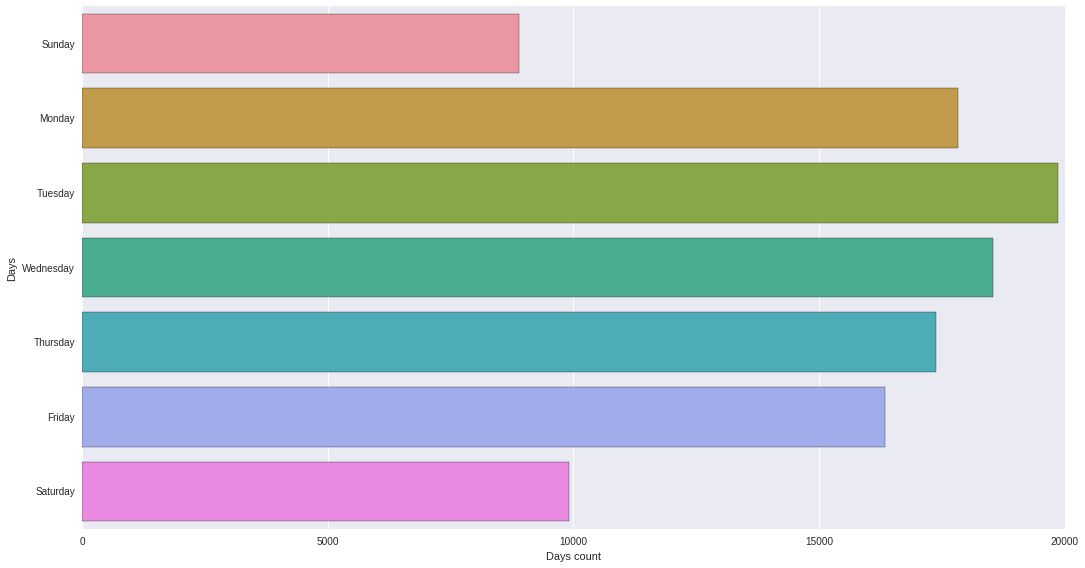

In [11]:
# Visualize average counts by day
days = df['DayOfWeek'].unique()
total_count_by_day = []
for day in days :
    total_count_by_day.append(df.loc[df['DayOfWeek'] == day, 'total'].mean() * 24)
factorPlot(total_count_by_day, days, 'Days count','Days')

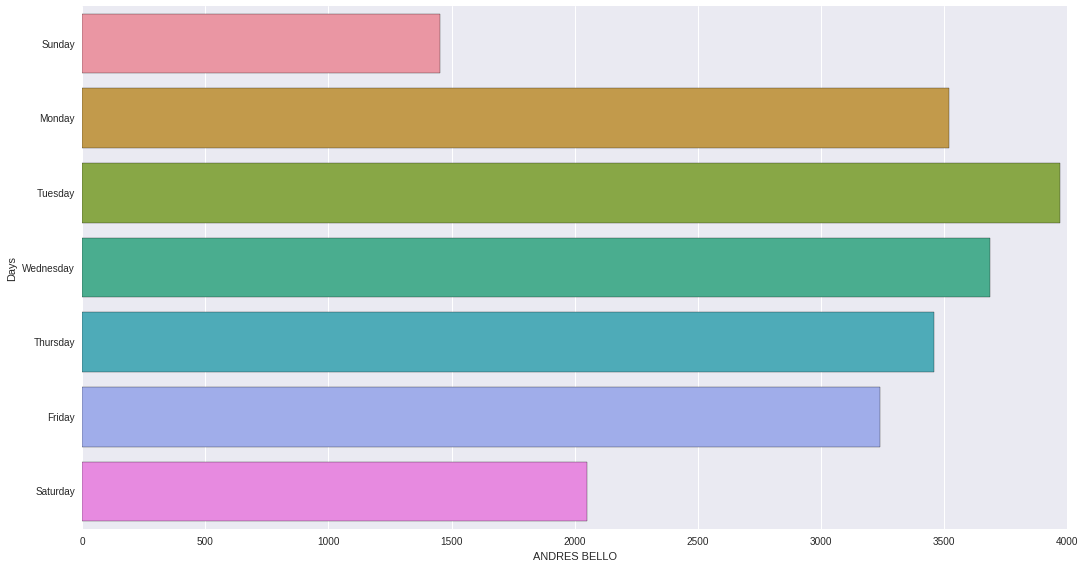

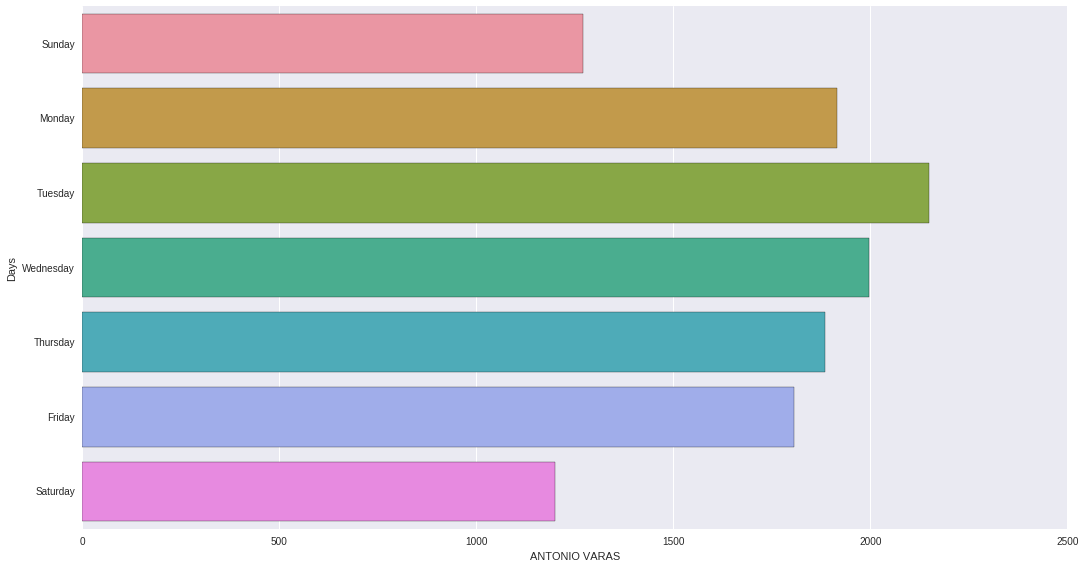

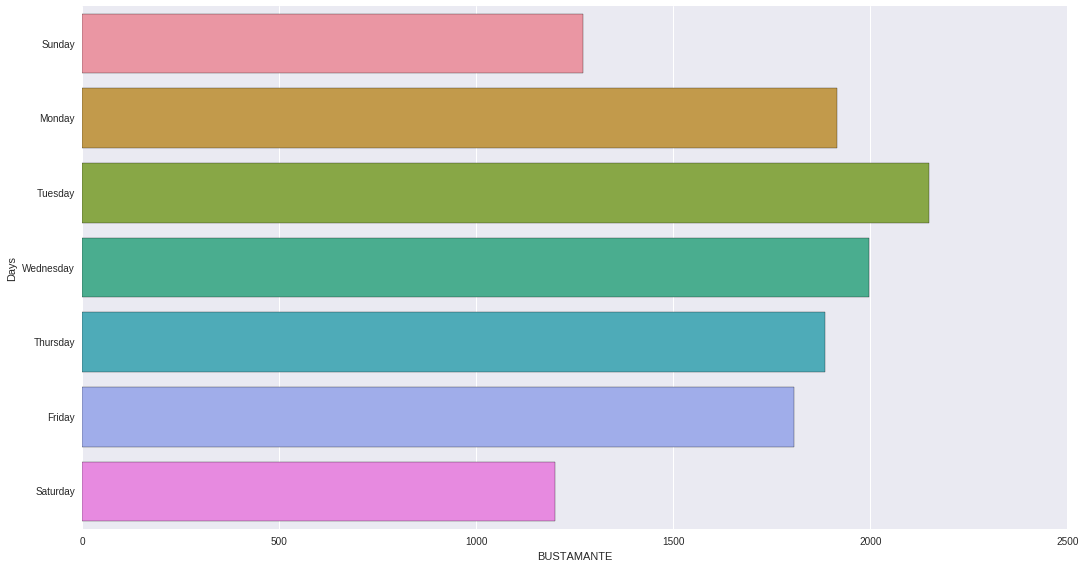

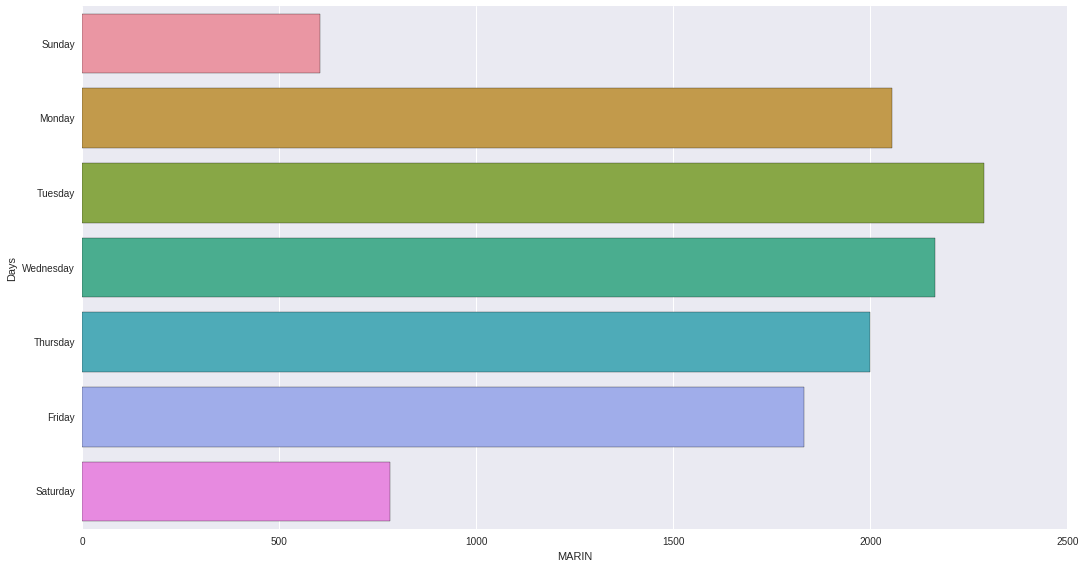

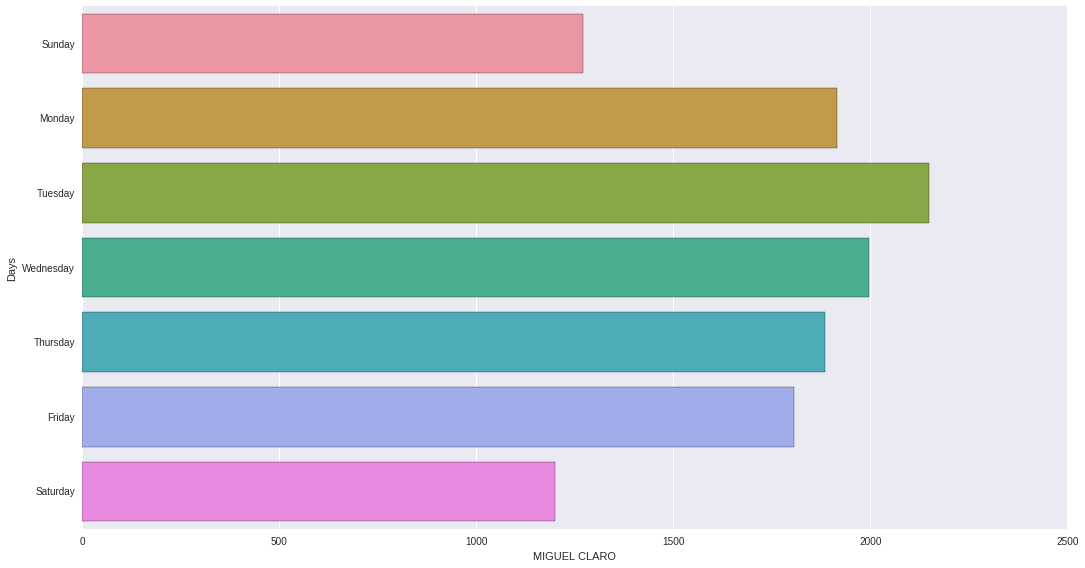

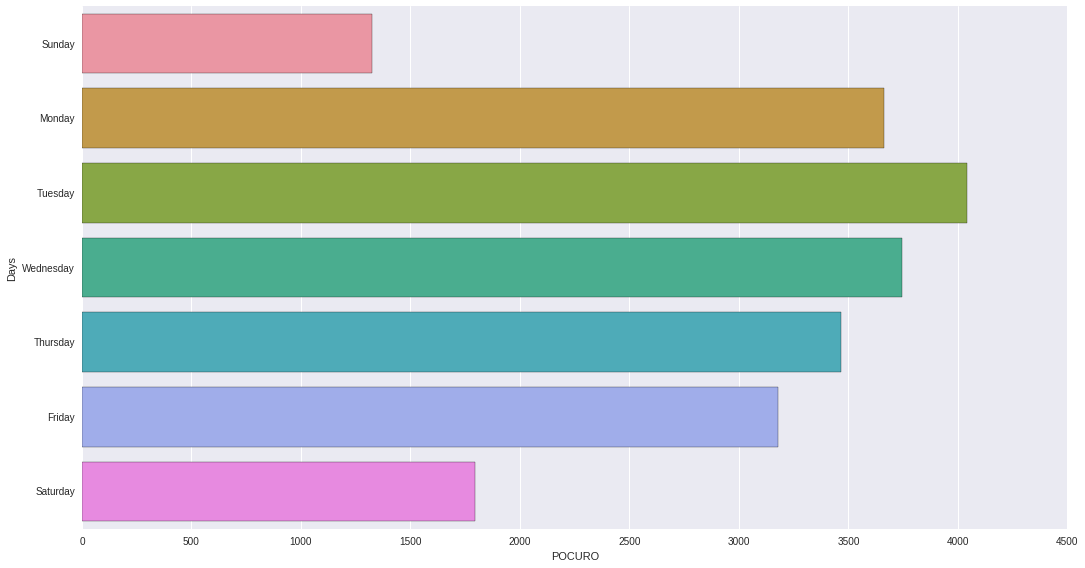

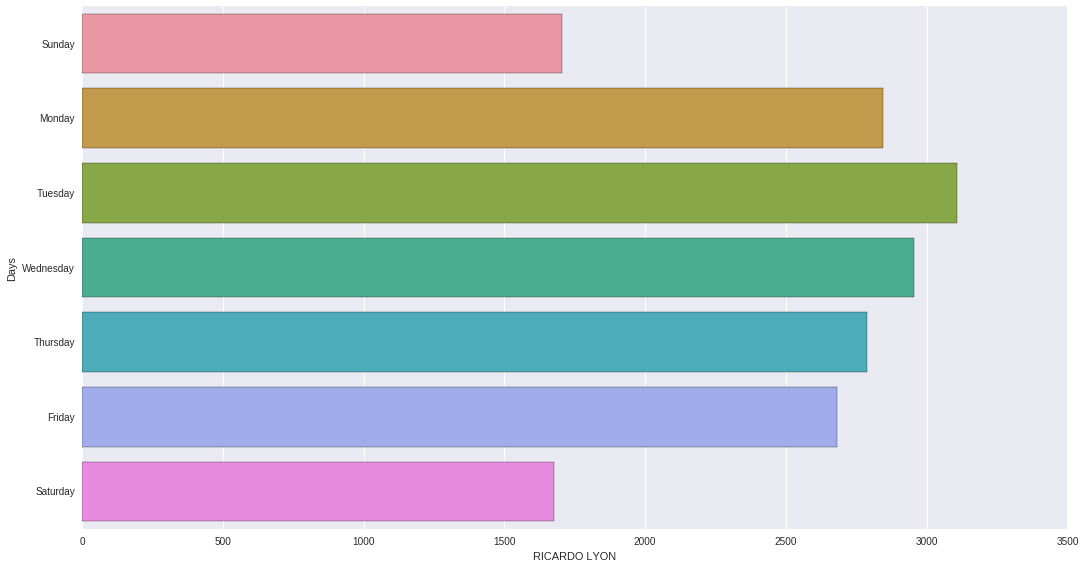

In [12]:
# visualize average counts by bikeways
for bike_way in bike_ways:
    total_count_by_day = []
    for day in days:
        bike_ways_by_day = df.loc[df['DayOfWeek'] == day, bike_way]
        total_count_by_day.append(bike_ways_by_day.mean() * 24)
        
    factorPlot(total_count_by_day, days, bike_way, 'Days')


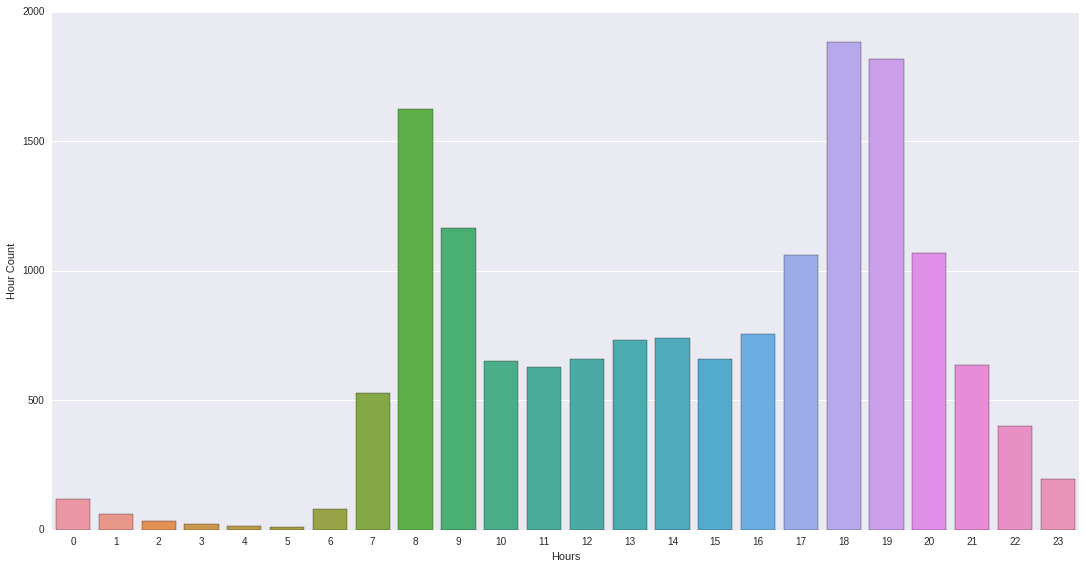

In [13]:
# Visualize total counts by hour
hours = df['Hour'].unique()
total_count_by_hour = []
for hour in hours:
    total_count_by_hour.append(df.loc[df['Hour'] == hour, 'total'].mean())
factorPlot(hours, total_count_by_hour, 'Hours','Hour Count')

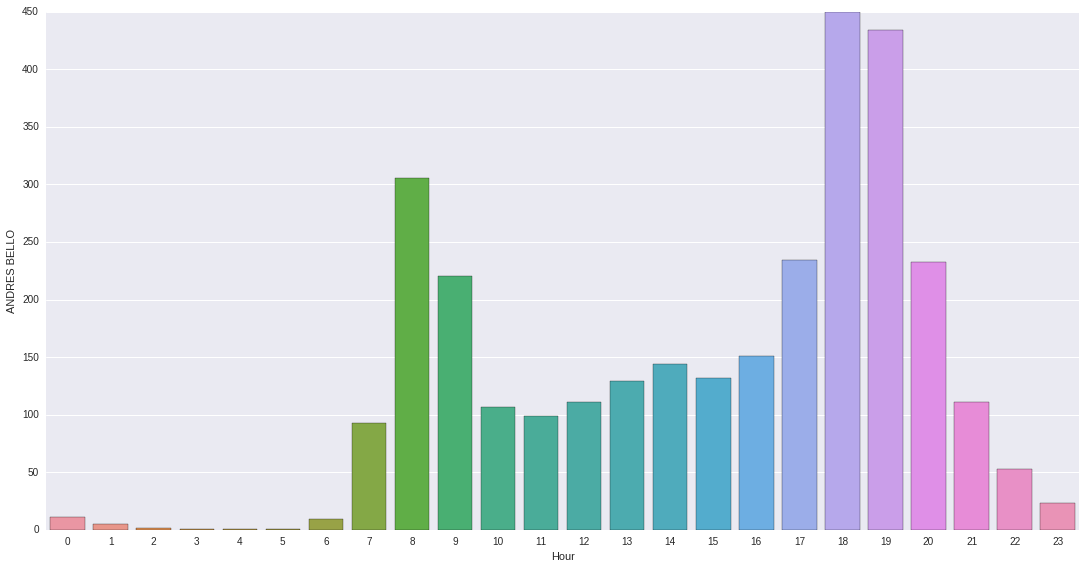

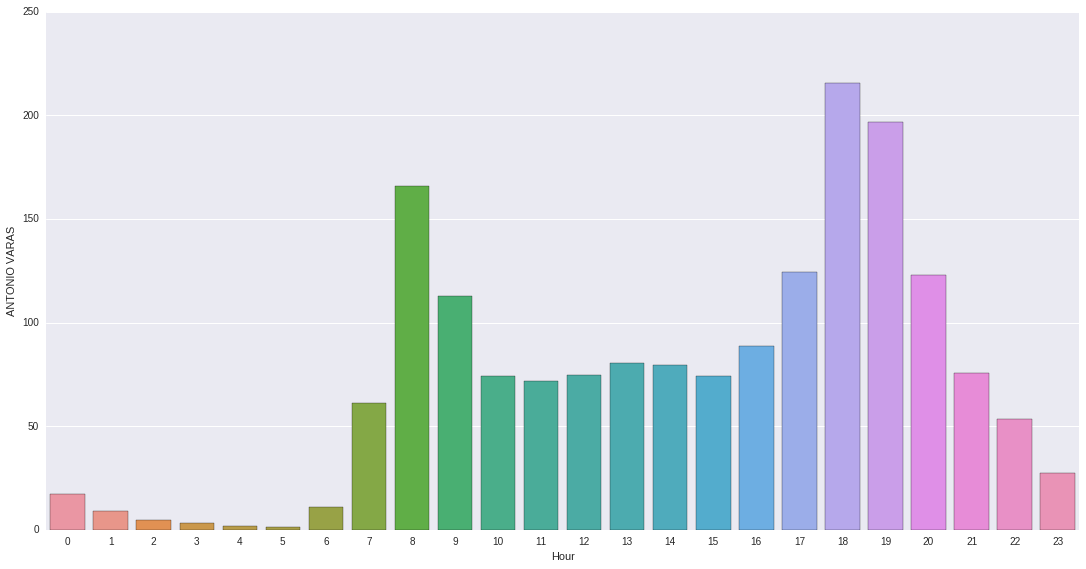

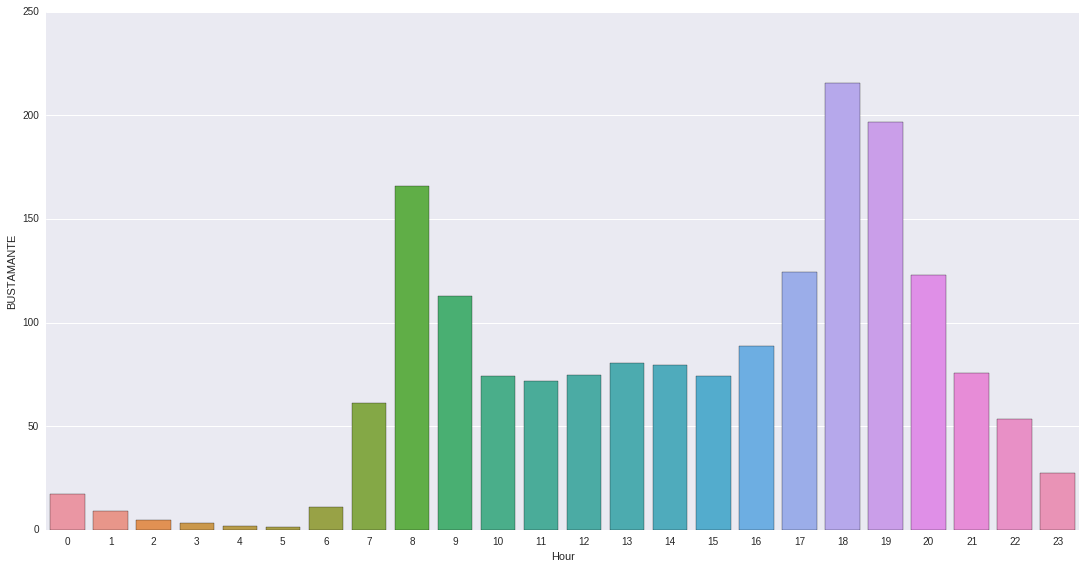

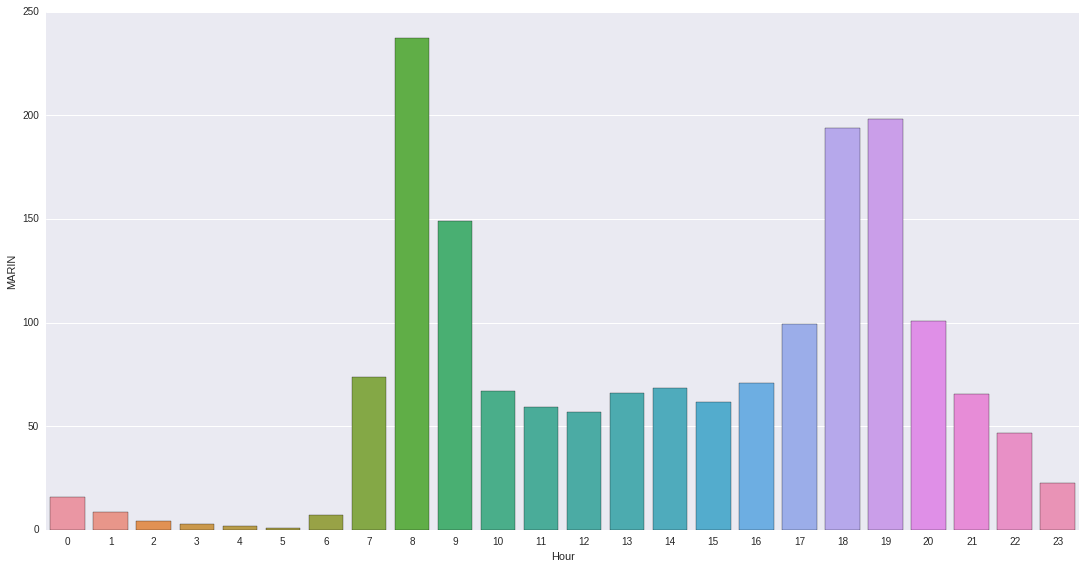

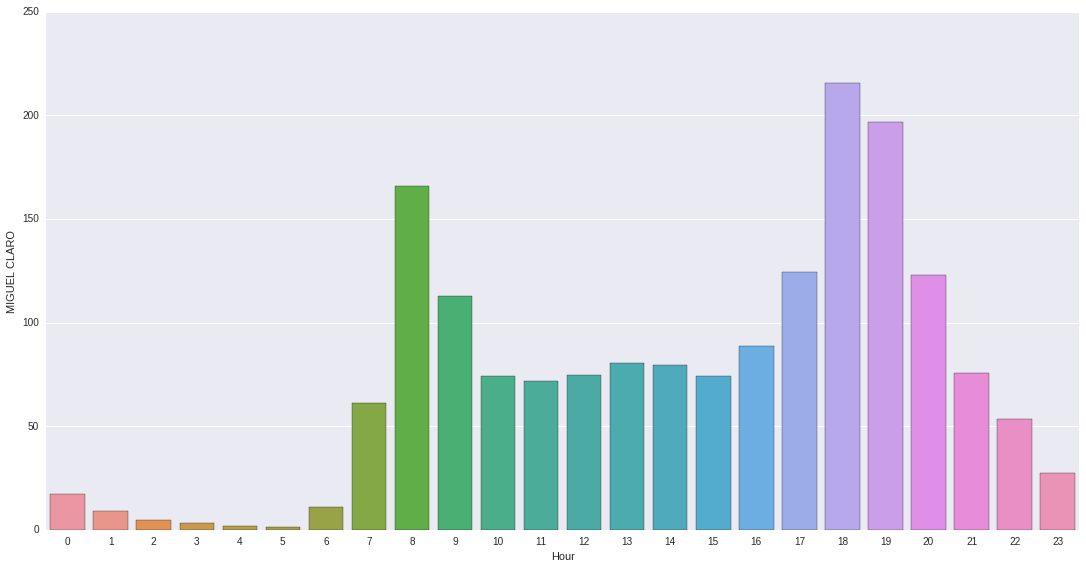

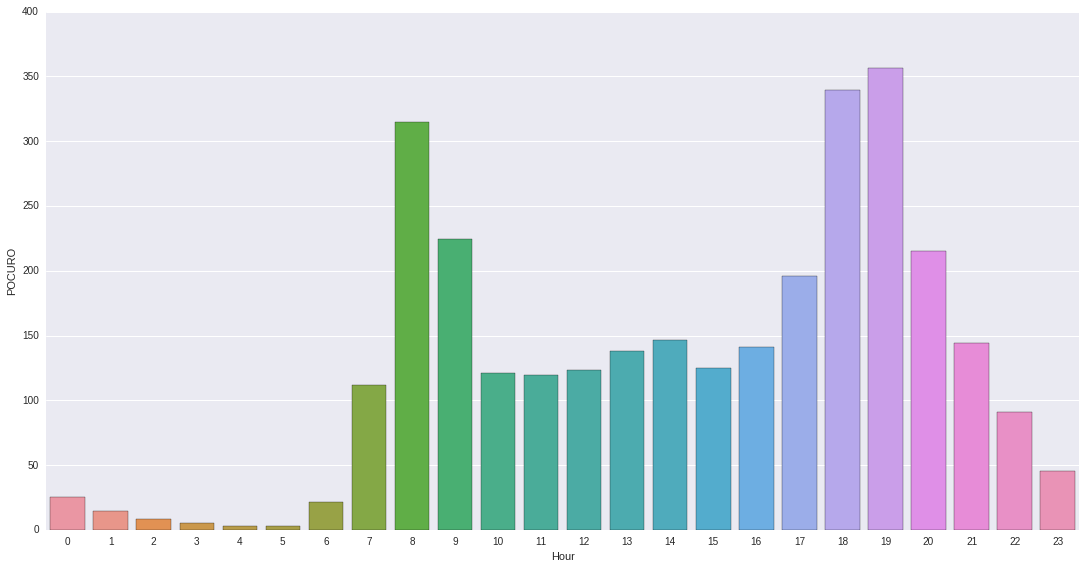

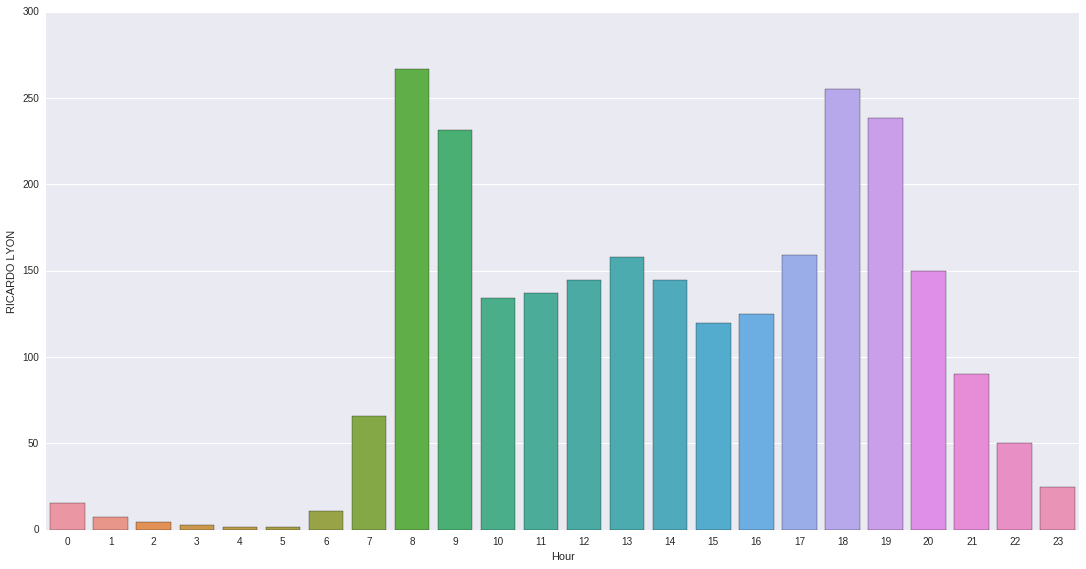

In [14]:
# visualize total counts by bikeways
for bike_way in bike_ways:
    total_count_by_hour = []
    for hour in hours:
        total_count_by_hour.append(df.loc[df['Hour'] == hour, bike_way].mean())
        
    factorPlot(hours, total_count_by_hour, 'Hour', bike_way)

# Predict total bikers in a bikeway given a date

In [203]:
# It's useful to create training and test data
from sklearn.cross_validation import train_test_split

def evaluate(alg, X_2, Y_2):
    score = alg.score(X_2, Y_2)
    print("accuracy: " + str(round(score * 100, 2)) + "%")

def test_alg(feature_data, targets, alg):
    for target in targets:
        X_1, X_2, Y_1, Y_2 = train_test_split(feature_data, 
                                              df[target], 
                                              test_size=0.5, 
                                              random_state=0)
        alg.fit(X_1, Y_1)
        print("Evaluating: " + target)
        evaluate(alg, X_2, Y_2)


In [204]:
# The columns we'll use to predict the target
features = ["date_delta"]

# Select our targets
targets = bike_ways

In [206]:
# Evaluate Linear regression

# LinearRegression
from sklearn.linear_model import LinearRegression

test_alg(df[features], targets, LinearRegression())

Evaluating: ANDRES BELLO
accuracy: 0.07%
Evaluating: ANTONIO VARAS
accuracy: -0.03%
Evaluating: BUSTAMANTE
accuracy: -0.03%
Evaluating: MARIN
accuracy: -0.03%
Evaluating: MIGUEL CLARO
accuracy: -0.03%
Evaluating: POCURO
accuracy: -0.07%
Evaluating: RICARDO LYON
accuracy: 0.06%


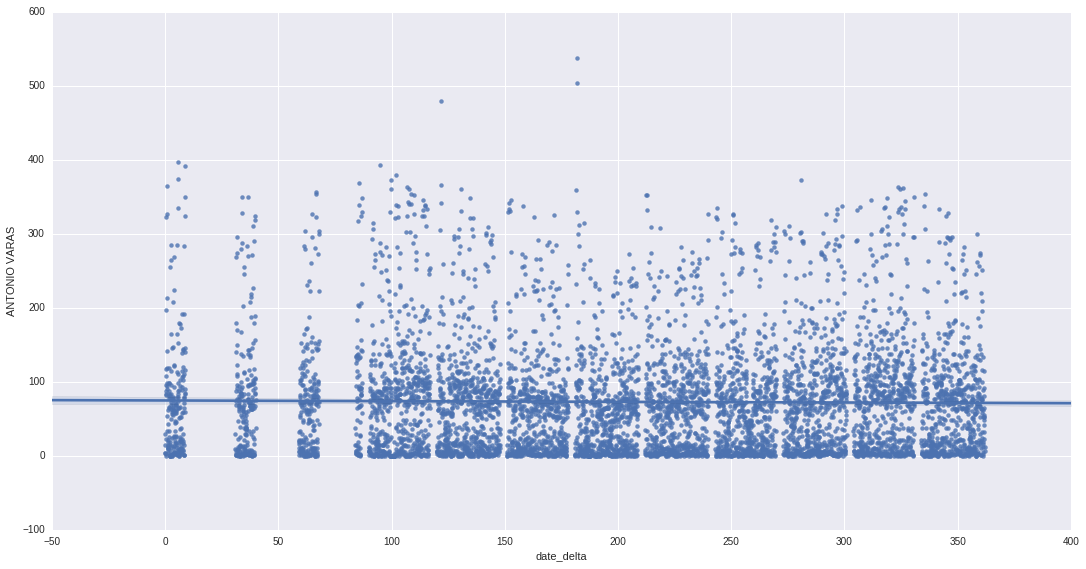

In [139]:
def plot_data(x_name, y_name, data):
    sns.lmplot(x=x_name, y=y_name, data=data,size=8, aspect=1.9);
    
plot_results("date_delta", "ANTONIO VARAS", df[['date_delta', 'ANTONIO VARAS']])


In [19]:
# Encode days of week to use it as feature
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
days_encoded = le.fit_transform(days)
print(days_encoded)

[3 1 5 6 4 0 2]


In [20]:
# Create a column "days_encoded"
df['days_encoded'] = le.fit_transform(df['DayOfWeek'])
df.head()

,Fecha,ANDRES BELLO,ANTONIO VARAS,BUSTAMANTE,MARIN,MIGUEL CLARO,POCURO,RICARDO LYON,DayOfWeek,Hour,total,date,date_delta,days_encoded
0,29/03/2015 00:00,8,38.0,38.0,17,38.0,31,18,Sunday,0,188.0,2015-03-29 00:00:00,84.000000,3
1,29/03/2015 01:00,6,14.0,14.0,14,14.0,20,13,Sunday,1,95.0,2015-03-29 01:00:00,84.041667,3
2,29/03/2015 02:00,1,6.0,6.0,11,6.0,24,10,Sunday,2,64.0,2015-03-29 02:00:00,84.083333,3
3,29/03/2015 03:00,3,6.0,6.0,11,6.0,10,9,Sunday,3,51.0,2015-03-29 03:00:00,84.125000,3
4,29/03/2015 04:00,1,4.0,4.0,4,4.0,11,3,Sunday,4,31.0,2015-03-29 04:00:00,84.166667,3


In [111]:
# Change features by split date
features = ['Hour', 'days_encoded']

# Test again
test_alg(df[features], targets, Lasso())

Evaluating: ANDRES BELLO
-4.33382493674
accuracy: 15.3%
Evaluating: ANTONIO VARAS
-3.00610635109
accuracy: 18.93%
Evaluating: BUSTAMANTE
-3.00610635109
accuracy: 18.93%
Evaluating: MARIN
-8.28267668177
accuracy: 9.27%
Evaluating: MIGUEL CLARO
-3.00610635109
accuracy: 18.93%
Evaluating: POCURO
-3.82581194039
accuracy: 15.99%
Evaluating: RICARDO LYON
-5.55862312889
accuracy: 12.52%


In [112]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2) # Hour and Day of Week

fixed_features = poly.fit_transform(df[features])

test_alg(fixed_features, targets, Lasso())

Evaluating: ANDRES BELLO
-2.28694411249
accuracy: 24.45%
Evaluating: ANTONIO VARAS
-1.5371953472
accuracy: 28.92%
Evaluating: BUSTAMANTE
-1.5371953472
accuracy: 28.92%
Evaluating: MARIN
-3.35205429522
accuracy: 20.35%
Evaluating: MIGUEL CLARO
-1.5371953472
accuracy: 28.92%
Evaluating: POCURO
-1.78941499057
accuracy: 27.3%
Evaluating: RICARDO LYON
-1.09901135833
accuracy: 33.63%


In [62]:
print(fixed_features)

[[  1.   0.   3.   0.]
 [  1.   1.   3.   3.]
 [  1.   2.   3.   6.]
 ..., 
 [  1.  21.   4.  84.]
 [  1.  22.   4.  88.]
 [  1.  23.   4.  92.]]


In [63]:
print(df[features])

      Hour  days_encoded
0        0             3
1        1             3
2        2             3
3        3             3
4        4             3
5        5             3
6        6             3
7        7             3
8        8             3
9        9             3
10      10             3
11      11             3
12      12             3
13      13             3
14      14             3
15      15             3
16      16             3
17      17             3
18      18             3
19      19             3
20      20             3
21      21             3
22      22             3
23      23             3
24       0             1
25       1             1
26       2             1
27       3             1
28       4             1
29       5             1
...    ...           ...
6642    18             6
6643    19             6
6644    20             6
6645    21             6
6646    22             6
6647    23             6
6648     0             4
6649     1             4


Evaluating: ANDRES BELLO


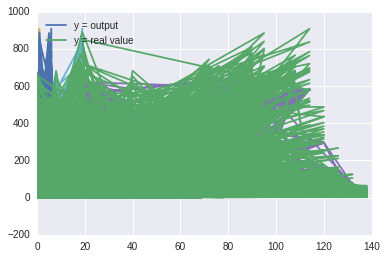

accuracy: 80.7%
Evaluating: ANTONIO VARAS


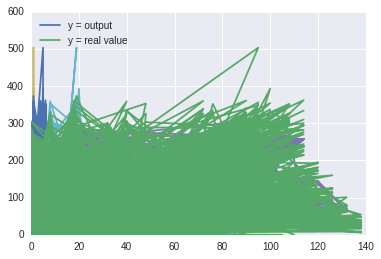

accuracy: 78.97%
Evaluating: BUSTAMANTE


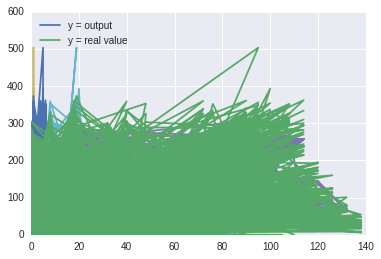

accuracy: 78.97%
Evaluating: MARIN


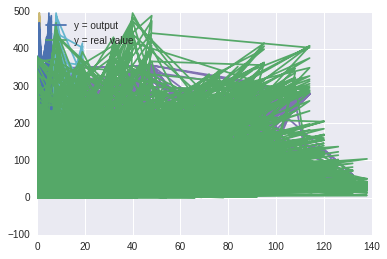

accuracy: 82.32%
Evaluating: MIGUEL CLARO


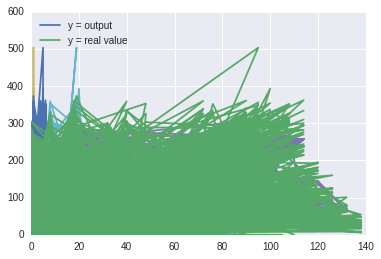

accuracy: 78.97%
Evaluating: POCURO


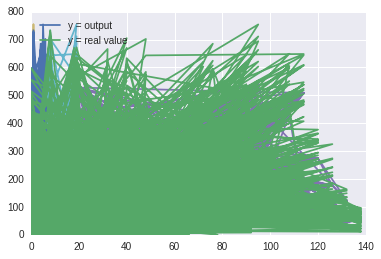

accuracy: 78.4%
Evaluating: RICARDO LYON


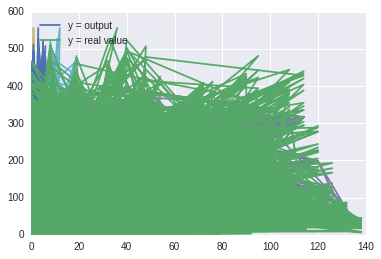

accuracy: 80.82%


In [126]:
from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}

alg = ensemble.GradientBoostingRegressor(**params)

test_alg(fixed_features2, targets, alg)

In [143]:
df[['date_delta', 'ANTONIO VARAS']]

,date_delta,ANTONIO VARAS
0,84.000000,38.0
1,84.041667,14.0
2,84.083333,6.0
3,84.125000,6.0
4,84.166667,4.0
5,84.208333,4.0
6,84.250000,2.0
7,84.291667,14.0
8,84.333333,29.0
9,84.375000,94.0
